In [25]:
# !pip install --upgrade scikit-learn numpy matplotlib

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [27]:
# print("scikit-learn:", sklearn.__version__)
# print("numpy:", np.__version__)

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv')

In [29]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [31]:
# analisando a quantidade de linhas e colunas do dataset
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas


In [32]:
# analisando a quantidade de dados duplicados
duplicados = df.duplicated()
duplicados = duplicados.sum()

print('A base tem %s dados duplicados' %(duplicados))

A base tem 0 dados duplicados


In [33]:
# analisando a quantidade de dados nulos
nulos = df.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [34]:
# selecionando todas as colunas que são string (object)
colunas_string = df.select_dtypes(include=['object']).columns

In [35]:
# Mapeia cada valor único para um número a partir de 1
for col in colunas_string:
    df[col], _ = pd.factorize(df[col], sort=True)
    df[col] += 1

In [36]:
# y : variavel de resposta
y = df['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [37]:
# x : base de modelagem
x = df.drop(columns=['default'])
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,2,6,2,5,1169,5,1,4,4,3,4,3,67,2,2,2,2,1,2,2
1,1,48,4,5,5951,2,3,2,1,3,2,3,22,2,2,1,2,1,1,2
2,4,12,2,1,2096,2,4,2,4,3,3,3,49,2,2,1,4,2,1,2
3,2,42,4,8,7882,2,4,2,4,2,4,1,45,2,1,1,2,2,1,2
4,2,24,3,3,4870,2,3,3,4,3,4,4,53,2,1,2,2,2,1,2


In [38]:
# aqui vamos deparar nossas base x e y em bases de treino e teste.
# também vamos usar o modelo com 30% dos dados em teste e 70% do modelo para trieno

SEED = 77

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, random_state = SEED)

In [39]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [40]:
# aqui definimos quantas vezes o modelo vai interar, ou seja, passar pelos dados, no caso 1000 vezes.
modelo = LogisticRegression(max_iter = 1000)

In [41]:
# neste momento estamos colocando a base para treina no algoritmo
modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

In [42]:
accuracy = modelo.score(treino_x, treino_y)

print('Nosso modelo de teste está com {:.2f}% de acurácia, ou seja, isso é o quão próximo nosso experimento está dos valores reais'.format(accuracy*100))

Nosso modelo de teste está com 73.57% de acurácia, ou seja, isso é o quão próximo nosso experimento está dos valores reais


In [43]:
# vamos usa o pandas para gerar previsoes do nosso modelo de teste
previsoes = modelo.predict(teste_x)
previsoes

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [44]:
acuracia  = accuracy_score(teste_y, previsoes)

print('Nosso modelo de teste está com {:.2f}% de acurácia, neste modelo'.format(acuracia*100))

Nosso modelo de teste está com 74.67% de acurácia, neste modelo


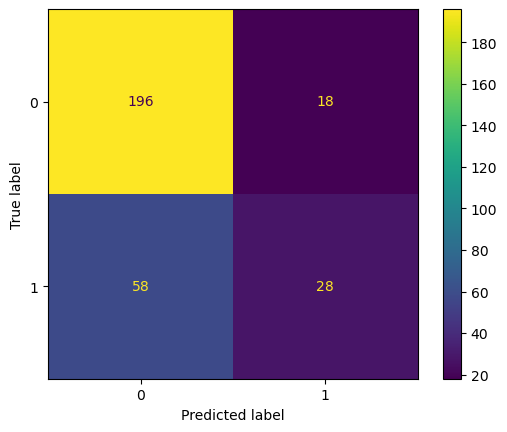

In [45]:
# Exibe a matriz de confusão
ConfusionMatrixDisplay.from_estimator(modelo, teste_x, teste_y)

# Necessário para exibir o gráfico
plt.show()

In [ ]:
# verdadeiros positivos y=0 x=0: são os bons pagadores que foram classificado como bom pagador 
# falsos positivos y=0 x=1: classificou como bom pagador alguem que na verdade é um mal pagador
# falsos negativos y=1 x=0: eu tenho um bom pagador que foi classificado com mal pagador 
# verdadeiros negativos y=1 x=1: nosso modelo classificou um mal pagador alguem que era mesmo u mal pagador  

In [46]:
modelo

LogisticRegression(max_iter=1000)

In [49]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       214
           1       0.61      0.33      0.42        86

    accuracy                           0.75       300
   macro avg       0.69      0.62      0.63       300
weighted avg       0.72      0.75      0.72       300



In [ ]:
prob_previsao = modelo.predict_log_proba(teste_x)[:,1]
prob_previsao

# tfp = taxa falsos positivos
# tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.6928385133666595


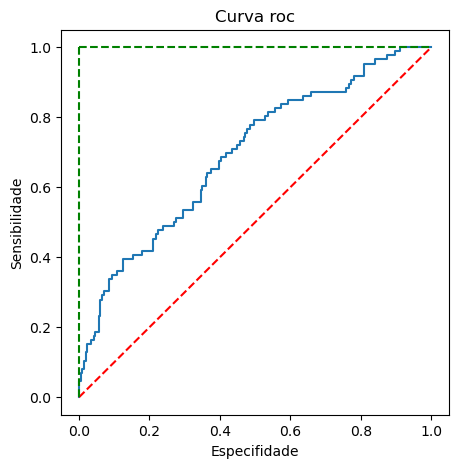

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva roc')
plt.plot(tfp, tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls = '--', c = 'red')
plt.plot([0, 0], [1, 0], ls = '--', c = 'green')
plt.plot([1, 1], ls = '--', c = 'green')
plt.show()

# quanto mais proximo da linha verde, sinal que nosso modelo está mais proximo de acertar nas predições

## Quantifica a Curva ROC através da área sob esta curva

Convenção Estatística:

* área < 0,7: baixa discriminiação
* 0,7 ≤ área < 0,8: discriminação aceitável
* 0,8 ≤ área < 0,9: discriminação excelente
* área > 0,9: discriminação excepcional

In [61]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [62]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
df[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.878000,35.546000,20.903000,3271.258000,0.300000
std,1.350904,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,4.000000,33.000000,18.000000,2319.500000,0.000000
75%,4.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [ ]:
# homens = 2, 4, 3
# mulheres = 1

df['sexo_est_civil'].value_counts()

# temos 310  mulheres e 690 homens

sexo_est_civil
4    548
1    310
3     92
2     50
Name: count, dtype: int64

In [ ]:
# nossa base de dados é desbalanceada 
df['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

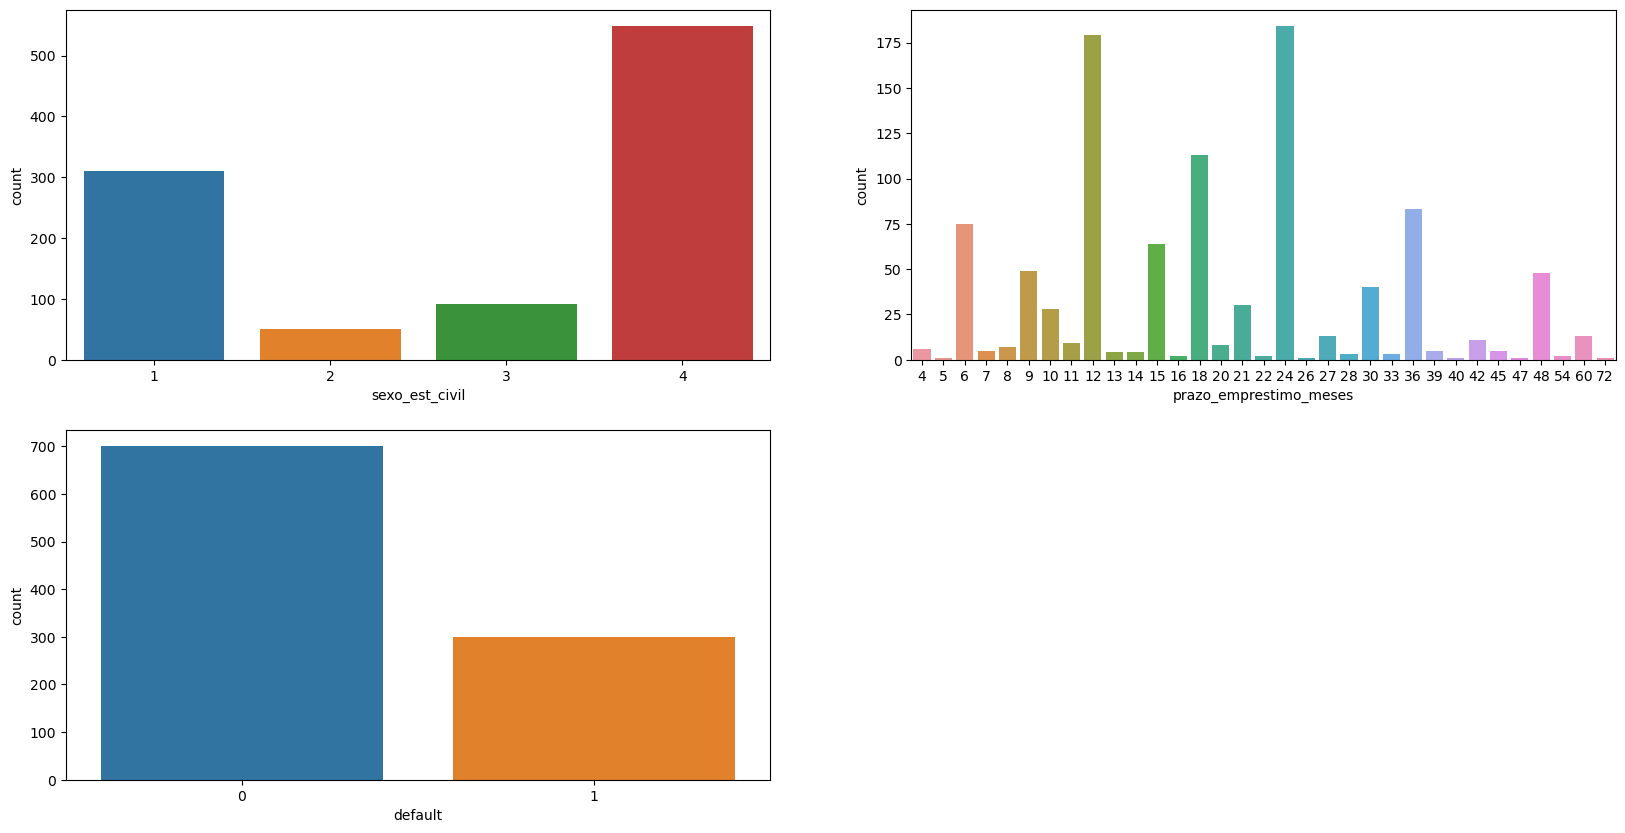

In [66]:
import seaborn as sns 

hists = ['sexo_est_civil', 'prazo_emprestimo_meses','default']

lista_hists = list(enumerate(hists))

plt.figure(figsize=(20, 10))

for hist in lista_hists:
    plt.subplot(2, 2, hist[0]+1)
    sns.countplot(x = hist[1], data = df)

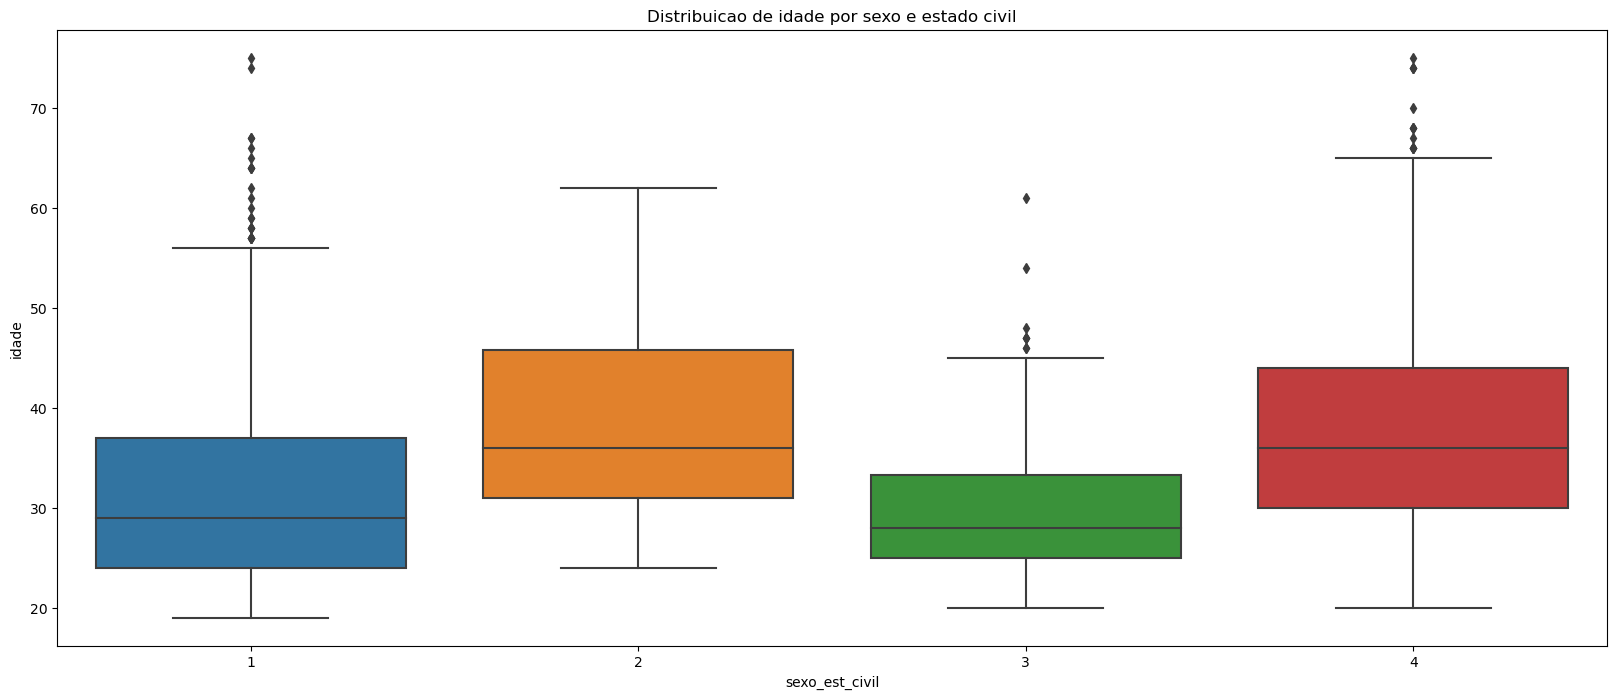

In [74]:
plt.figure(figsize=(20, 8))

sns.boxplot( x = 'sexo_est_civil', y = 'idade', data=df)
plt.title('Distribuicao de idade por sexo e estado civil')
plt.show()

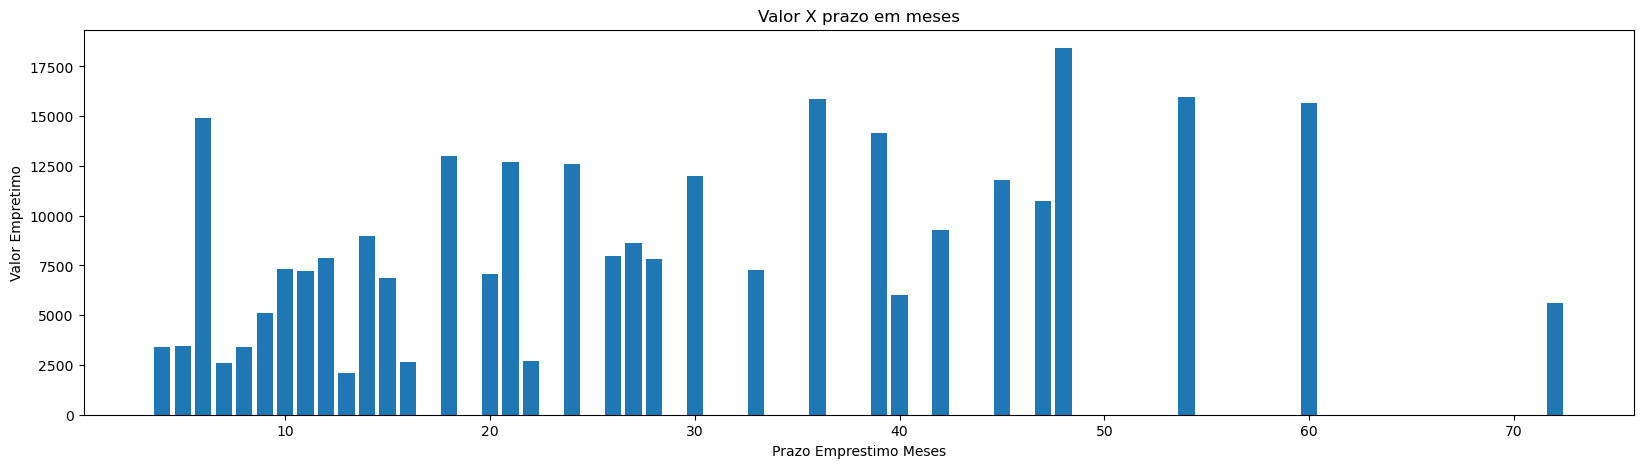

In [69]:
plt.figure(figsize=(20, 5))

plt.bar(df['prazo_emprestimo_meses'], df['valor_emprestimo'])
plt.xlabel('Prazo Emprestimo Meses')
plt.ylabel('Valor Empretimo')
plt.title('Valor X prazo em meses')
plt.show()